# Imports

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

models = ['Aluminium','Prusa','Formlabs','Ultimaker_006','Ultimaker_010','Ultimaker_015','Ultimaker_020']

# Data

In [2]:
air_chambers = {}

for model in models:
    model_df = pd.read_csv(f'./data/{model}.csv',delimiter=';',header=None,names=(['Time','A','Pressure']))
    model_df.drop(columns=['A'],axis=1,inplace=True)
    
    air_chambers[model]={}
    air_chambers[model]['Time'] = model_df['Time']
    air_chambers[model]['Time'] = air_chambers[model]['Time'].head(1400)
    air_chambers[model]['Pressure'] = model_df['Pressure'].head(1400)/10
    
    air_chambers[model]['PressureDrop'] = air_chambers[model]['Pressure'] - air_chambers[model]['Pressure'][0]


# Plotjes

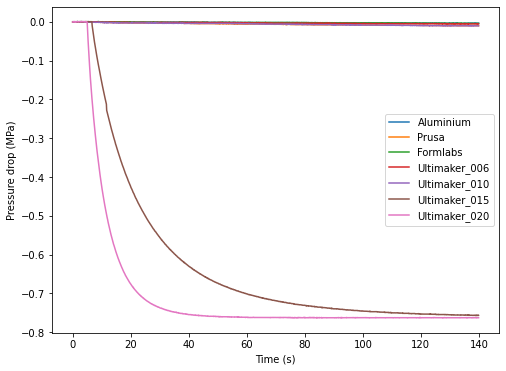

In [3]:
plt.figure(figsize=(8,6))
for model in air_chambers:
    t = np.arange(0, len(air_chambers[model]['Time'])/10, 0.1)
    plt.plot(t,air_chambers[model]['PressureDrop'], label=model)
    
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure drop (MPa)')
plt.savefig('./figures/result_airchamber.pdf',bbox_inches = 'tight')

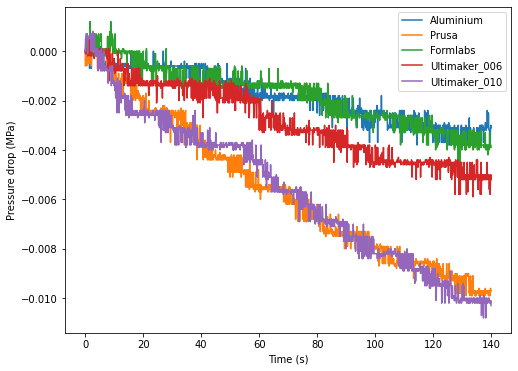

In [4]:
plt.figure(figsize=(8,6))
for model in list(air_chambers.keys())[:-2]:
    t = np.arange(0, len(air_chambers[model]['Time'])/10, 0.1)
    plt.plot(t,air_chambers[model]['PressureDrop'], label=model)
    
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure drop (MPa)')
plt.savefig('./figures/result_airchamber_part.pdf',bbox_inches = 'tight')

# Repeatability

In [5]:
Test1_repeatability=pd.read_csv (r'/Users/evazillen/Documents/Studie/Afstuderen/Thesis/1_Tests/Test1_lekdoormateriaal/Resultaten_In_en_uit_elkaar_deel.csv', delimiter=";", header=1, names=(['Time',"Test1","Test2","Test3",'Aluminium','G','SLA Prusa','SLA Formlabs','Ultimaker 0.10',]))
# Test1_repeatability.drop(['A','B','C','D','E','F','G'],axis=1,inplace=True)

In [6]:
Timer=Test1_repeatability["Time"]
T1r=Test1_repeatability["Test1"]/1000
T2r=Test1_repeatability["Test2"]/1000
T3r=Test1_repeatability["Test3"]/1000
Ar=Test1_repeatability["Aluminium"]/1000
SPr=Test1_repeatability["SLA Prusa"]/1000
SFr=Test1_repeatability["SLA Formlabs"]/1000
UBr=Test1_repeatability["Ultimaker 0.10"]/1000


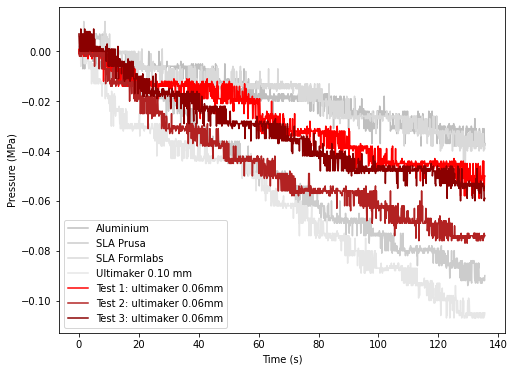

In [7]:
tr = np.arange(0, len(Timer)/10, 0.1)
plt.figure(figsize=(8,6))

plt.plot(tr,Ar, color = '0.75',label='Aluminium')
plt.plot(tr,SPr, color = '0.8',label='SLA Prusa')
plt.plot(tr,SFr, color = '0.85',label='SLA Formlabs')
# plt.plot(tr,UAr, label='Ultimaker 0.06 mm')
plt.plot(tr,UBr,color = '0.9', label='Ultimaker 0.10 mm')
plt.plot(tr,T1r,'-r', label='Test 1: ultimaker 0.06mm')
plt.plot(tr,T2r, color ='firebrick',label='Test 2: ultimaker 0.06mm')
plt.plot(tr,T3r, color = 'darkred', label='Test 3: ultimaker 0.06mm')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.savefig('./figures/app_airchamber_reconnected.pdf',bbox_inches = 'tight')

In [8]:
Test1_repeatability2=pd.read_csv (r'/Users/evazillen/Documents/Studie/Afstuderen/Thesis/1_Tests/Test1_lekdoormateriaal/Resultaten_opnieuwaanzetten.csv', delimiter=";", header=1, names=(['Time',"Test1","Test2","Test3",'Aluminium','SLA Prusa','SLA Formlabs','Ultimaker 0.06mm','Ultimaker 0.10']))
# Test1_repeatability.drop(['A','B','C','D','E','F','G'],axis=1,inplace=True)

In [9]:
Timer2=Test1_repeatability2["Time"]
T1r2=Test1_repeatability2["Test1"]/1000
T2r2=Test1_repeatability2["Test2"]/1000
T3r2=Test1_repeatability2["Test3"]/1000
Ar2=Test1_repeatability2["Aluminium"]/1000
SPr2=Test1_repeatability2["SLA Prusa"]/1000
SFr2=Test1_repeatability2["SLA Formlabs"]/1000
UAr2=Test1_repeatability2["Ultimaker 0.06mm"]/1000
UBr2=Test1_repeatability2["Ultimaker 0.10"]/1000


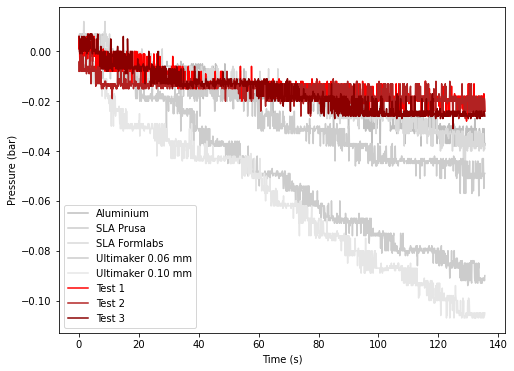

In [10]:
tr2 = np.arange(0, len(Timer)/10, 0.1)
plt.figure(figsize=(8,6))

plt.plot(tr2,Ar2, color = '0.75',label='Aluminium')
plt.plot(tr2,SPr2, color = '0.8',label='SLA Prusa')
plt.plot(tr2,SFr2, color = '0.85',label='SLA Formlabs')
plt.plot(tr,UAr2, color = '0.8', label='Ultimaker 0.06 mm')
plt.plot(tr2,UBr2,color = '0.9', label='Ultimaker 0.10 mm')
plt.plot(tr2,T1r2,'-r', label='Test 1')
plt.plot(tr2,T2r2, color ='firebrick',label='Test 2')
plt.plot(tr2,T3r2, color = 'darkred', label='Test 3')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Pressure (bar)')
plt.savefig('./figures/app_airchamber_rerun.pdf',bbox_inches = 'tight')